# Data Ingestion

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Data Transformation

In [3]:
from sklearn.model_selection import train_test_split
x=df.drop('concrete_compressive_strength',axis=1)
y=df['concrete_compressive_strength']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=42)

In [5]:
from sklearn.preprocessing import RobustScaler

In [6]:
ro=RobustScaler()
x_train=ro.fit_transform(x_train)
x_test=ro.transform(x_test)

# Model Train

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [8]:
models={
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
}

In [9]:
param={
    'RandomForest':  {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'GradientBoosting': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    'KNN':  {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
    'Linear Regression':  {
        'fit_intercept': [True, False]
    }
}




In [10]:
from sklearn.metrics import r2_score

In [11]:
def evaluate_models(x_train, y_train,x_test,y_test,models,param):
    
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = GridSearchCV(model,para,cv=3)
            gs.fit(x_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(x_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(x_train)

            y_test_pred = model.predict(x_test)

            train_model_score = r2_score(y_train, y_train_pred)

            test_model_score = r2_score(y_test, y_test_pred)
            sns.regplot(x=y_test,y=y_test_pred,ci=None,color='indianred')
            
            plt.show()

            report[list(models.keys())[i]] = test_model_score

        return report


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

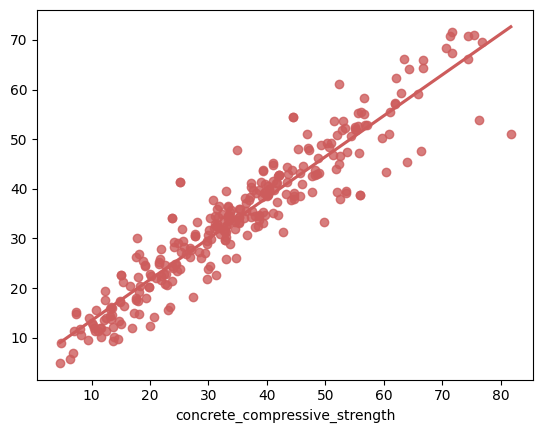

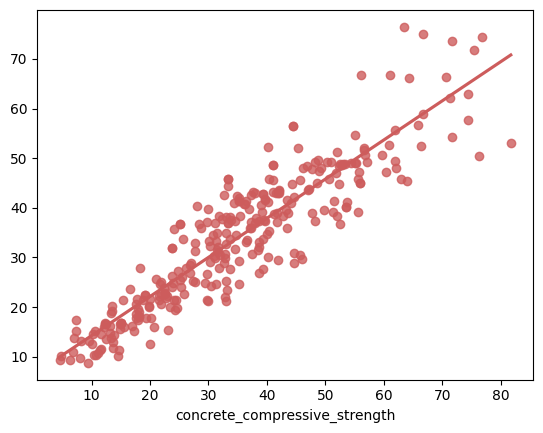

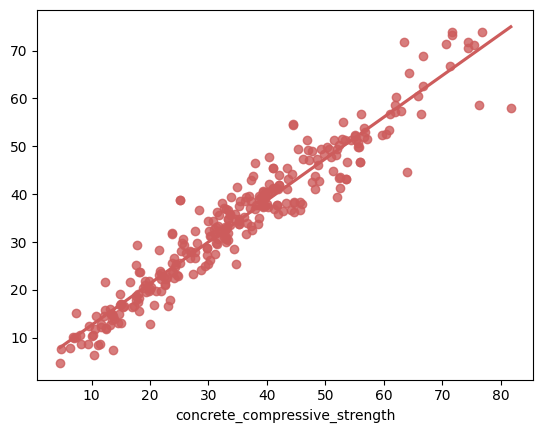

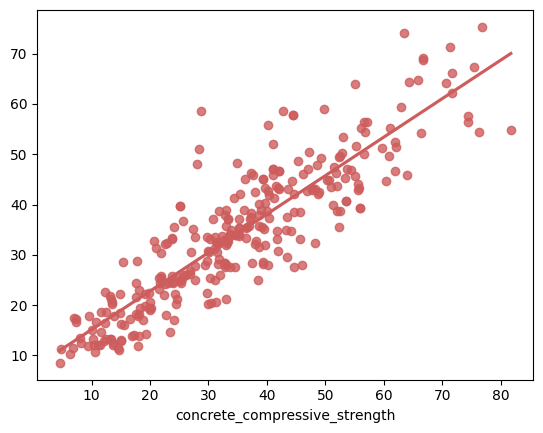

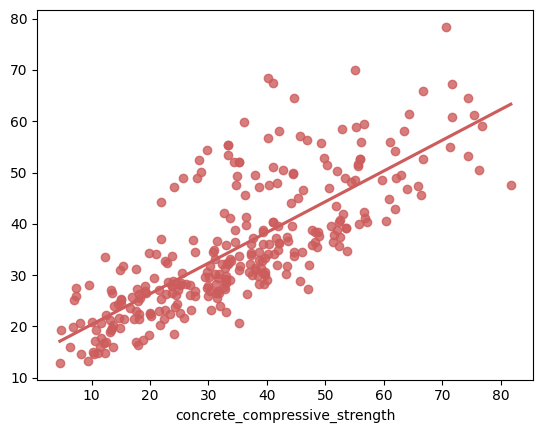

{'RandomForest': 0.8794258314667046,
 'SVR': 0.8242976163558602,
 'GradientBoosting': 0.918765221327246,
 'KNN': 0.7841580917319918,
 'Linear Regression': 0.590817938978222}

In [14]:
evaluate_models(x_train, y_train,x_test,y_test,models,param)